## Observations and Insights 

1. Capomulin and Ramicane appears to be the two promising candidates for treatment based on the reduction in tumor volume,  (see summary statistics, box plot). Other drug treatments data is close to the placebo (control group with no treatment). Effectiveness of Capomulin treatment is further confirmed by the gradual decrease in tumor size with increased traement time (see line plot).
2. Data shows less effectiveness of the drug treatment with incresing body weight (see scatter plot). A strong positive correlation (r = 0.84) between the body weight and tumor size implies that heavier the mouse, less reduction in tumor size (or bigger the tumor) and hence less effective is the drug treatment. 
3. Data appears to be quite relaible (especially for Capomulin, Ramicane, Infubinol, Ceftamin) with no outliers except for infubinol treatment (only one outlier) (see boxplot).
4. The total number of mice measured is more for Capomulin and Ramicane (see bar plot) as compared to placebo and other drugs. Further analysis is required to confirm whether this difference is due to the better suvival of Capomulin/ Ramicane treated mice or lack of consistent sample size across the drug regimen. This can be confirmed by getting the starting number of mice (timepoint = 0) for placebo and each drug regimen.


In [1]:
# PREPARE THE DATA

# Import Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Create a path to access the csv data files to be used
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results using "read_csv" function
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata
study_results = pd.read_csv(study_results_path)
study_results

# Combine the "mouse data" and "study results" dataframes into a single dataframe - for merging the two data sets, use "outer" join (to get all the information from both the dataframes) and "Mouse ID" as location.
drug_screening_merge_df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")
drug_screening_merge_df

# Total number of mice used in the study - since the merged dataframe shows repeats of mouse ID (same mouse used for different timepoints), use "nunique" function to get the number of unique mices.
num_mice = drug_screening_merge_df["Mouse ID"].nunique()
num_mice

249

In [2]:
# CLEAN THE DATA

# Get all the duplicate mice that shows up for Mouse ID and Timepoint - use "duplicated" function and set keep as "False" to consider all of the same values as duplicates
duplicate_mice_id = drug_screening_merge_df[drug_screening_merge_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mice_id

# Optional: Get all the data for the duplicate mouse ID - use "loc" function to filter the mouse id column for the duplicated mouse (g989)
duplicate_mice_id = drug_screening_merge_df.loc[drug_screening_merge_df["Mouse ID"] == "g989",:]
duplicate_mice_id

# Create a clean DataFrame by dropping the duplicate mouse by its ID - use the "loc" function on "Mouse ID" column to get the duplicated mouse ID (index) and then use "drop" function to delete that mouse data from the dataframe
drug_screening_df = drug_screening_merge_df.drop(drug_screening_merge_df.loc[drug_screening_merge_df["Mouse ID"]=="g989"].index)
drug_screening_df

# Check the number of mice in the clean DataFrame - use "nunique" function. This must be one mouse less than the original dataframe since we droped one mouse (g989).
num_mice_clean = drug_screening_df["Mouse ID"].nunique()
num_mice_clean


248

## Summary Statistics

In [3]:
# SUMMARY STATISTICS BY GROUPBY METHOD

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Calculate the MEAN of the tumor volume for each drug regimen - groupby the data with "Drug Regimen" column and use mean function on "Tumor Volume (mm3)" column to get average of tumor volume associated with each drug regimen
tumor_volume_mean = drug_screening_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_volume_mean

# Calculate the MEDIAN of the tumor volume for each drug regimen - groupby the data with "Drug Regimen" column and use median function on "Tumor Volume (mm3)" column to get average of tumor volume associated with each drug regimen
tumor_volume_median = drug_screening_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_volume_median 

# Calculate the VARIANCE of the tumor volume for each drug regimen - groupby the data with "Drug Regimen" column and use "var" function on "Tumor Volume (mm3)" column to get variance of tumor volume associated with each drug regimen
tumor_volume_var = drug_screening_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_volume_var

# Calculate the STANDARD DEVIATION of the tumor volume for each drug regimen - groupby the data with "Drug Regimen" column and use "std" function on "Tumor Volume (mm3)" column to get standard deviation of tumor volume associated with each drug regimen
tumor_volume_std = drug_screening_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_volume_std

# Calculate the STANDARD ERROR OF MEAN (sem) of the tumor volume for each drug regimen - groupby the data with "Drug Regimen" column and use "sem" function on "Tumor Volume (mm3)" column to get sem of tumor volume associated with each drug regimen
tumor_volume_sem = drug_screening_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
tumor_volume_sem 

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_summary_statistics_df = pd.DataFrame({"Tumor Volume Mean": tumor_volume_mean, "Tumor Volume Median": tumor_volume_median, "Tumor Volume STD": tumor_volume_std, "Tumor Volume SEM": tumor_volume_sem})
drug_summary_statistics_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume STD,Tumor Volume SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.320930,50.446266,6.622085,0.544332
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


In [4]:
# SUMMARY STATISTICS BY AGGREGATION METHOD

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen - groupby the data with "Drug Regimen" column and use "agg" function on "Tumor Volume (mm3)" column to get all the statistical values for tumor volume associated with each drug regimen 
drug_summary_statistics_agg_df = drug_screening_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median","std", "sem"])
drug_summary_statistics_agg_df

# In order to match the groupby dataframe (drug_summary_statistics_df), rename the column headers using "rename" function - use old names as key and new names as value
drug_summary_statistics_agg_df.rename(columns={"mean" : "Tumor Volume Mean", "median" : "Tumor Volume Median", "std" : "Tumor Volume STD",  "sem" : "Tumor Volume SEM"})

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume STD,Tumor Volume SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.320930,50.446266,6.622085,0.544332
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


## Bar and Pie Charts

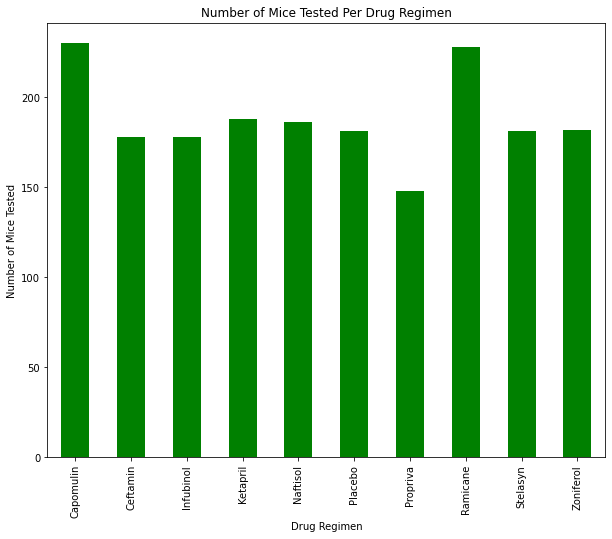

In [5]:
# BAR CHART USING PANDAS METHOD 
# Generate a bar plot showing the total number of mice tested (measurement taken) for each drug regimen using Pandas 

# Create the data for the bar chart by grouping "Drug Regimen" column (x- axis) with the "count" of "Mouse ID" columnn (y-axis) 
num_mice_per_drug_regimen = drug_screening_df.groupby("Drug Regimen")["Mouse ID"].count()

# Set the plotting area (figure) size, title for the chart and labels for x and y axis
plt.figure(figsize=(10,8))
plt.title("Number of Mice Tested Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

# Plot the bar chart
panda_bar_plot = num_mice_per_drug_regimen.plot(kind="bar", width = 0.5, color="green")


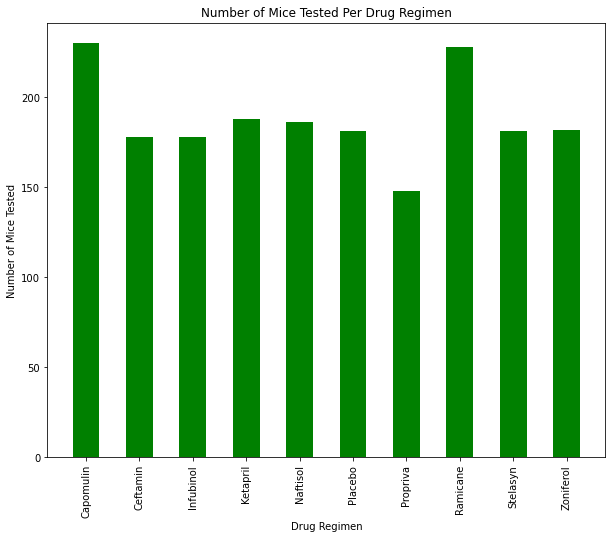

In [6]:
# BAR CHART USING MATPLOTLIB METHOD 
# Generate a bar plot showing the total number of mice tested (measurement taken) for each drug regimen using Matplotlib 

# Create the data for the chart (x and y axis values)
x_values = np.arange(len(num_mice_per_drug_regimen))
y_values = num_mice_per_drug_regimen

# Set tick location to the x axis values, tick labels to the "index values" (drug names) of the dataframe 
tick_location = x_values
tick_label = list(num_mice_per_drug_regimen.index.values) 


# Set the plotting area (figure) size, title for the chart and labels for x and y axis (rotation is to get the angle for x axis lable display)
plt.figure(figsize=(10,8))
plt.title("Number of Mice Tested Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(tick_location, tick_label, rotation = 90)

# Plot the chart same color and bar width as pandas plot
plt.bar(x_values, y_values, width = 0.5, color = "green")
plt.show()


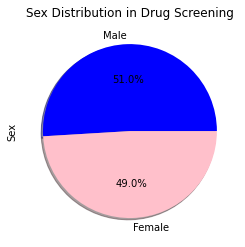

In [7]:
# PIE CHART USING PANDAS METHOD 
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Create the data for the pie chart - use the "value_counts" function for "Sex" column to get the number of male and female mice used in the study
sex_distribution_data = drug_screening_df["Sex"].value_counts()

# Generate pie plot with the data
sex_distribution_panda_pie = sex_distribution_data.plot(kind="pie", colors = ["blue", "pink"], title=("Sex Distribution in Drug Screening"), autopct = "%.1f%%", shadow = True)


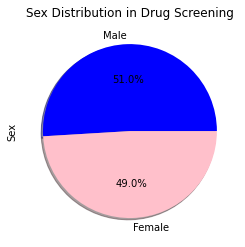

In [8]:
# PIE PLOT USING MATPLOTLIB METHOD 
# Generate a pie plot showing the distribution of female versus male mice using pyplot - use the "Sex distribution data"

# Create the data for the pie chart - use the "value_counts" function for "Sex" column to get the number of male and female mice used in the study
sex_distribution_data = drug_screening_df["Sex"].value_counts()

# Create title, label, and variables for the pie chart
plt.title("Sex Distribution in Drug Screening")
plt.ylabel("Sex")
labels = list(sex_distribution_data.index)
colors = "blue", "pink"

# Plot the pie chart
plt.pie(sex_distribution_data, labels = labels, colors = colors, autopct="%1.1f%%", shadow = True)
plt.show()

## Quartiles, Outliers and Boxplots

In [9]:
# Create a Dataframe that shows the last (greatest) time point for each mouse - use "groupby" and "max" function to get the last/ maximum time period for each mouse per drug treatment.
max_timepoint_df = drug_screening_df.groupby("Mouse ID")["Timepoint"].max()
max_timepoint_df

#  Merge this grouped Dataframe with the cleaned DafaFrame (drug_screening_df) - use "inner" join and "Mouse ID" and "Timepoint" as location to get all information associated with the "last timepoint" of each mouse. This dataframe will be used for further statistical analysis.
final_tumor_volume_df = pd.merge(drug_screening_df, max_timepoint_df, how="inner", on=["Mouse ID", "Timepoint"])
final_tumor_volume_df

# QUARTILES AND OUTLIERS

# Create a list that holds the treatment names, as well as a second, empty list to hold the final tumor volume data.
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final_tumor_volume_data = []

# Loop through each drug in the treatment list - use "loc" function to find the rows that correspond to each treatment. Append the resulting final tumor volumes for each drug to the empty list (final_tumor_volume_data). 

for drug in treatment_list:
    final_tumor_volume_per_drug_df = final_tumor_volume_df.loc[final_tumor_volume_df["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
    final_tumor_volume_data.append(final_tumor_volume_per_drug_df)
    
    quartiles = final_tumor_volume_per_drug_df.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq =quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    all_potential_outliers = final_tumor_volume_per_drug_df.loc[(final_tumor_volume_per_drug_df < lower_bound) | (final_tumor_volume_per_drug_df > upper_bound)]
           
    # Print the data for all the four drug regimen in the list
    print(f"The {drug} lower quartile of Tumor Volume (mm3) is: {lowerq}")
    print(f"The {drug} upper quartile of Tumor Volume (mm3) is: {upperq}")
    print(f"The {drug} interquartile range of Tumor Volume (mm3) is: {iqr}")
    print(f"The {drug} lower boundary is {lower_bound} and the values below this could be outliers.")
    print(f"The {drug} upper boundary is {upper_bound} and the values above this could be outliers.")
    print(f"The {drug} all potential outliers count is: {all_potential_outliers.count()}\n")   
       
   

The Capomulin lower quartile of Tumor Volume (mm3) is: 32.37735684
The Capomulin upper quartile of Tumor Volume (mm3) is: 40.1592203
The Capomulin interquartile range of Tumor Volume (mm3) is: 7.781863460000004
The Capomulin lower boundary is 20.70456164999999 and the values below this could be outliers.
The Capomulin upper boundary is 51.83201549 and the values above this could be outliers.
The Capomulin all potential outliers count is: 0

The Ramicane lower quartile of Tumor Volume (mm3) is: 31.56046955
The Ramicane upper quartile of Tumor Volume (mm3) is: 40.65900627
The Ramicane interquartile range of Tumor Volume (mm3) is: 9.098536719999998
The Ramicane lower boundary is 17.912664470000003 and the values below this could be outliers.
The Ramicane upper boundary is 54.30681135 and the values above this could be outliers.
The Ramicane all potential outliers count is: 0

The Infubinol lower quartile of Tumor Volume (mm3) is: 54.04860769
The Infubinol upper quartile of Tumor Volume (m

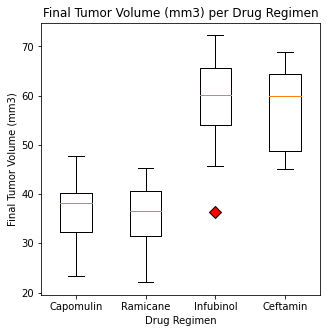

In [10]:
# BOX PLOT
# Generate a box plot of the final tumor volume ("final_tumor_volume_data") for all four treatment regimens. Highlight any potential outliers in the plot by changing their color ("red") and style ("diamond")

# Format (highlight) the potential outliers in the plot - set color to "red", style to "diamond", size to 8
red_diamond = dict(markerfacecolor="r", marker="D", markersize=8)

# Creat box plot - use "subplot" to show box plot of all the four teatments in the same graph area (figure)
figure, ax = plt.subplots(figsize=(5,5))
ax.boxplot(final_tumor_volume_data, flierprops=red_diamond)

# Set title, labels and ticks for the plot
ax.set_title("Final Tumor Volume (mm3) per Drug Regimen")
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Final Tumor Volume (mm3)")
ax.xaxis.set(ticks=range(1, len(treatment_list)+1),ticklabels=treatment_list)

plt.show()


## Line and Scatter Plots

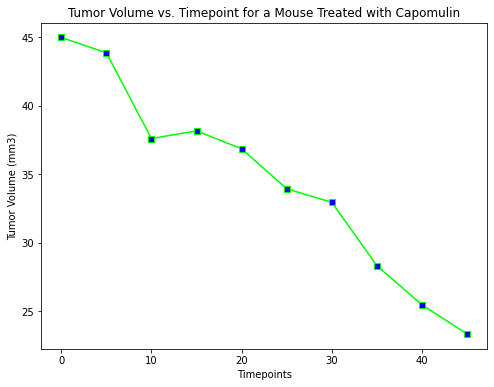

In [11]:
# LINE PLOT
# Generate a line plot tumor volume vs. time point for a mouse treated with Capomulin

#  Get a sample mouse treated with Capomulin using "sample" function
sample_mouse = (drug_screening_df[drug_screening_df["Drug Regimen"]=="Capomulin"]).sample()

# Create data/ values for x_axis and y_axis - use "values" function to get the sample mouse ID and "loc" function to get the sample mouse "treatment timepoints"/ "tumor volumes"
x_values = timepoints = drug_screening_df.loc[drug_screening_df["Mouse ID"] == sample_mouse["Mouse ID"].values[0], "Timepoint"]
y_values = tumor_volume = drug_screening_df.loc[drug_screening_df["Mouse ID"] == sample_mouse["Mouse ID"].values[0], "Tumor Volume (mm3)"]

# Set the title for the plot and labels for x and y axis
plt.figure(figsize=(8,6))
plt.title("Tumor Volume vs. Timepoint for a Mouse Treated with Capomulin")
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume (mm3)")

# Generate the line plot
plt.plot(x_values, y_values, color="lime", marker="s", markerfacecolor="b")
plt.show()

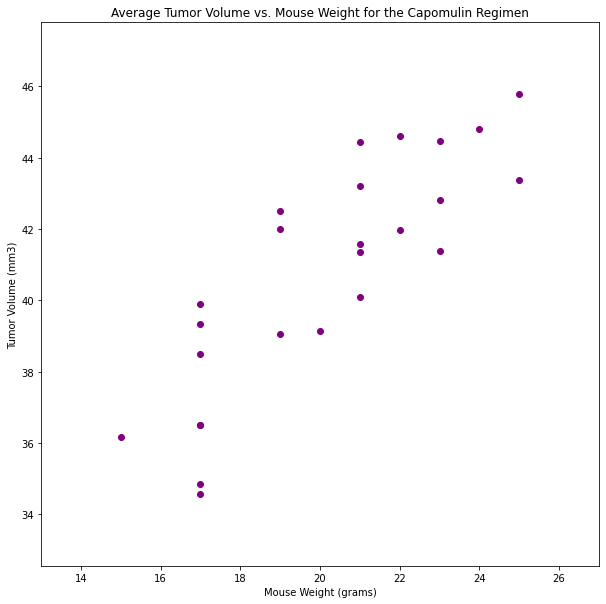

In [12]:
# SCATTER PLOT
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Create a dataframe with only "Capomulin" treatment (regimen) by using the "loc" function on "Drug Regimen" column of drug_screening_df 
capomulin_regimen_df = drug_screening_df.loc[drug_screening_df["Drug Regimen"]=="Capomulin",:]

# For x_axis data - groupby "Mouse ID" with the mean of mouse weight AND for y_axis data - groupby "Mouse ID" with the mean of Tumor Volume (mm3)
x_values = capomulin_regimen_df.groupby("Mouse ID")["Weight (g)"].mean()
y_values = capomulin_regimen_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Set the figure size, title for the plot, labels and limits for x and y axis
plt.figure(figsize=(10,10))
plt.title("Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen")
plt.xlabel("Mouse Weight (grams)")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(x_values.min()-2, x_values.max()+2)
plt.ylim(y_values.min()-2, y_values.max()+2)

# Create the scatter plot
plt.scatter(x_values, y_values, color="purple")
plt.show()


## Correlation and Regression

In [13]:
# CORRELATION COEFFICIENT 
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen

# Use "Pearson" method for the calculation
correlation_coefficient = st.pearsonr(x_values, y_values)
print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {round(correlation_coefficient[0],2)}")

The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.84


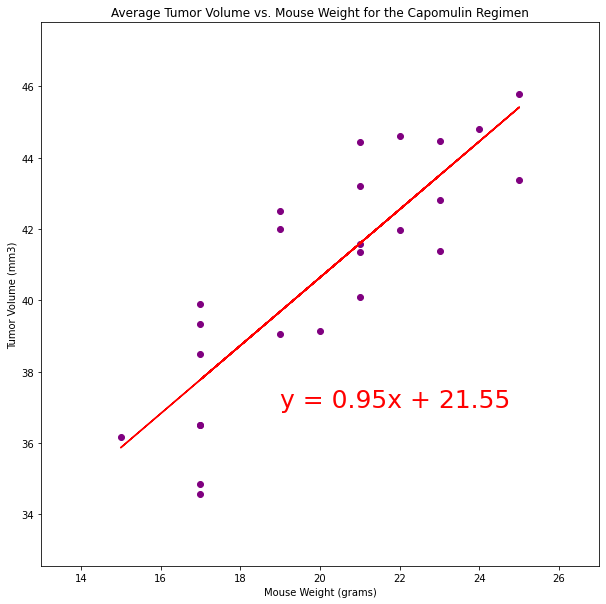

In [16]:
# LINEAR REGRESSION MODEL
# Calculate the linear regression model for mouse weight and average tumor volume for the Capomulin regimen

# Create data for linear regression equation
x_values = capomulin_regimen_df.groupby("Mouse ID")["Weight (g)"].mean()
y_values = capomulin_regimen_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create a string of the linear regression equation to be displyed on scatter plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot with linear regression
plt.figure(figsize=(10,10))
plt.scatter(x_values, y_values, color="purple")
plt.plot(x_values,regress_values,"r-")

# Add ("annotate") the linear regression equation to the plot
plt.annotate(line_eq,(19,37),fontsize=25,color="red")

# Add plot title, axis (x and y) labels and limits
plt.title("Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen")
plt.xlabel("Mouse Weight (grams)")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(x_values.min()-2, x_values.max()+2)
plt.ylim(y_values.min()-2, y_values.max()+2)

plt.show()